<a href="https://colab.research.google.com/github/Sainimmala79/BHARAT_INTERN/blob/main/Bharat_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [ ]:
df = pd.read_csv('/content/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
print(y[:10])

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Species, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=60)

In [ ]:
x_train.shape

(120, 4)

In [ ]:
x_test.shape

(30, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
111            6.4           2.7            5.3           1.9
[[ 0.60232117 -0.85178697  0.81219442  0.8644853 ]]


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2467 (9.64 KB)
Trainable params: 2467 (9.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 3s - loss: 1.1221 - accuracy: 0.2833 - 3s/epoch - 748ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0663 - accuracy: 0.4083 - 15ms/epoch - 4ms/step
Epoch 3/100
4/4 - 0s - loss: 0.9597 - accuracy: 0.6250 - 16ms/epoch - 4ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9114 - accuracy: 0.5917 - 14ms/epoch - 3ms/step
Epoch 5/100
4/4 - 0s - loss: 0.8681 - accuracy: 0.6667 - 13ms/epoch - 3ms/step
Epoch 6/100
4/4 - 0s - loss: 0.8060 - accuracy: 0.6917 - 14ms/epoch - 4ms/step
Epoch 7/100
4/4 - 0s - loss: 0.7506 - accuracy: 0.7083 - 14ms/epoch - 3ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7361 - accuracy: 0.7417 - 14ms/epoch - 4ms/step
Epoch 9/100
4/4 - 0s - loss: 0.6626 - accuracy: 0.8083 - 15ms/epoch - 4ms/step
Epoch 10/100
4/4 - 0s - loss: 0.6254 - accuracy: 0.8083 - 14ms/epoch - 3ms/step
Epoch 11/100
4/4 - 0s - loss: 0.6070 - accuracy: 0.8167 - 14ms/epoch - 3ms/step
Epoch 12/100
4/4 - 0s - loss: 0.5566 - accuracy: 0.7833 - 14ms/epoch - 3ms/step
Epoch 13/100
4/4 - 0s - loss: 0.5651 - accuracy: 

In [ ]:
pred = model.predict(x_test)
print(pred[:10])

1/1 [==============================] - 0s 99ms/step
[[2.5627192e-03 9.9312758e-01 4.3097031e-03]
 [4.8813131e-03 9.8393089e-01 1.1187848e-02]
 [5.7707191e-03 9.7841555e-01 1.5813753e-02]
 [9.9995553e-01 4.3723499e-05 6.7411622e-07]
 [5.1454040e-03 9.7567958e-01 1.9175032e-02]
 [9.9990571e-01 9.2568705e-05 1.6588212e-06]
 [8.3068451e-03 9.8508781e-01 6.6052969e-03]
 [9.9996400e-01 3.5717363e-05 2.3719147e-07]
 [9.9955362e-01 4.3741806e-04 8.9349169e-06]
 [2.1307045e-03 6.0026962e-01 3.9759967e-01]]


In [ ]:
pred = np.argmax(pred, axis=-1)
print(pred[:10])

[1 1 1 0 1 0 1 0 0 1]


In [ ]:
print(y_test[:10])

69     1
71     1
97     1
42     0
73     1
35     0
67     1
33     0
23     0
133    2
Name: Species, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, pred))

0.9


In [ ]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[13  0  0]
 [ 0  9  1]
 [ 0  2  5]]


Text(50.72222222222221, 0.5, 'actual')

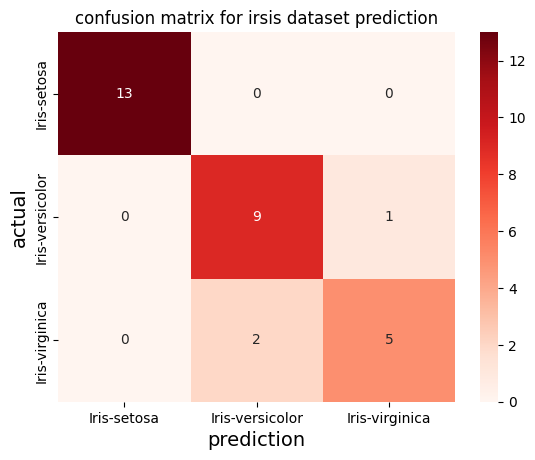

In [ ]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)